In [1]:
import read_data
import numpy as np
from matplotlib import pyplot as plt

(calls, allbases, demands, times, calls_latlong) = read_data.populate_data()
allbases = np.delete(np.array(allbases), 2, 1)
demands = np.delete(np.array(demands), 2, 1)
times = np.array(times)
calls_latlong = np.array(calls_latlong)

ind = np.random.randint(0, allbases.shape[0], 8)
bases = allbases[ind,:]
points = np.delete(allbases, ind, 0)

chosen_base_costs = times[ind,:]

In [2]:
def ind_to_set_of_ind_one_removed(chosen_base_costs):
    all_one_removed = []
    for i in range(len(chosen_base_costs)):
        all_one_removed.append(np.delete(chosen_base_costs, i, axis=0))
    return all_one_removed

In [3]:
all_one_removed = ind_to_set_of_ind_one_removed(chosen_base_costs)


In [4]:
def radius_to_coverage (chosen_costs, r1=600, graph=True):
    r1_coverage = np.any(chosen_costs < r1, 0)
    r1_covered = np.nonzero(r1_coverage)
    r1_exposed = np.nonzero(np.logical_not(r1_coverage))

    c = np.shape(r1_covered)[1]
    e = np.shape(r1_exposed)[1]
    ratio = (c / (c + e))
    

    if graph:
        plt.figure()
        plt.scatter(demands[r1_covered,0],demands[r1_covered,1], c='b')
        plt.scatter(demands[r1_exposed,0],demands[r1_exposed,1], c='r')
        plt.scatter(bases[:,0],bases[:,1], c='y')
        plt.show()
    
    return 100 * ratio

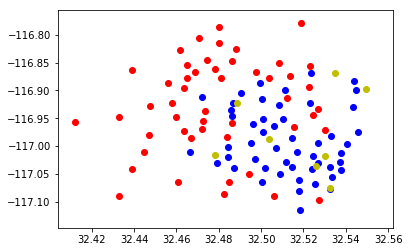

51.0

In [11]:
c = radius_to_coverage(chosen_base_costs)
c

In [29]:

for scenario in all_one_removed:
    coverage = radius_to_coverage(scenario, graph=False)
    print ("Coverage: %02d."%coverage, "\tDifference: %02.d." %(c - coverage))

Coverage: 40. 	Difference: 11.
Coverage: 49. 	Difference: 02.
Coverage: 48. 	Difference: 03.
Coverage: 48. 	Difference: 03.
Coverage: 47. 	Difference: 04.
Coverage: 50. 	Difference: 01.
Coverage: 47. 	Difference: 04.
Coverage: 48. 	Difference: 03.
